# Lab 2 - step by step approach
https://github.com/DS200-SP2024-Hunter/Week02-DueJan24/blob/main/README.md

### Exploratory Data Analysis Using Classic Novels


Task: 

The main objective of today's lab is to repeat the activities in Section 1.3 of the textbook and then duplicate them on a novel of your choosing. You should maintain the existing analyses from Sections 1.3, 1.3.1, and 1.3.2 on the novels Huck Finn and Little Women, while adding your own anaylsis of the novel you have chosen. To do this, you will need to combine code from three different Jupyter Notebooks.

## Task 1 and 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [4]:
# how to read a url and split it based on some charater (in this case "CHAPTER")

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [27]:
# instead of using "table" from datascience package, We are going to learn how to use Pandas DataFrame
# df is a variable assigned to store the dataframe
# dataframe is basically a table with rows and columns which are very often used in real world projects

df = pd.DataFrame(huck_finn_chapters, columns=['Chapter'])
df.head()

,Chapter
0,I. YOU don't know about me without you have re...
1,II. WE went tiptoeing along a path amongst the...
2,"III. WELL, I got a good going-over in the morn..."
3,"IV. WELL, three or four months run along, and ..."
4,V. I had shut the door to. Then I turned aroun...


#### I am exhibiting how to perform for one novel, it is your task to do it for Little Women Novel and another Novel of your choice

## Task 3: 

Optional - Your task is to eliminate all of the extra Project Gutenberg text that appears at the end of the final chapter. Do this for not only your book but for Huck Finn and Little Women as well. Make sure to add a text box that explains how you did this and provide some output that provides evidence that it worked.

Explaination of the issue: 

As we divide the plain txt file based on the character Chapters, all chapters are properly divided except final chapter. The reason is there are some other text present towards the end of the novels (like credits, license, etc) and it is being considered as part of final chapter. 

### Task 4: 

Find 2 to 10 characters in your novel (or possibly just often-used words, if you think that will be more interesting), then produce a plot of the cumulative number of times each name/word appears per chapter. Adapt the code from Section 1.3.1—that is, copy-paste relevant sections of that code into a code box you create in your own Jupyter notebook, then edit appropriately—to do this. Write a summary, in a text box, that explains a little bit about what your plot appears to reveal about your book.


In [8]:
# as a sample code, I am doing it for 4 terms. You can go throught the https://inferentialthinking.com/data/huck_finn.txt file and find suitable 10 characters/places/things

ten_char_huck = ['King', 'Miss Watson', 'Cabin', 'England']
king = np.cumsum(np.char.count(huck_finn_chapters, 'king'))
miss_watson = np.cumsum(np.char.count(huck_finn_chapters, 'Miss Watson'))
cabin = np.cumsum(np.char.count(huck_finn_chapters, 'cabin'))
england = np.cumsum(np.char.count(huck_finn_chapters, 'England'))

In [12]:
# creating a data frame, consisting of the items and their counts
count = pd.DataFrame({'King':king, 'Miss Watson': miss_watson, 'Cabin': cabin, 'England': england})
count.head()

,King,Miss Watson,Cabin,England
0,2,3,0,0
1,5,5,0,0
2,7,12,0,0
3,8,14,0,0
4,11,14,0,0


<AxesSubplot:>

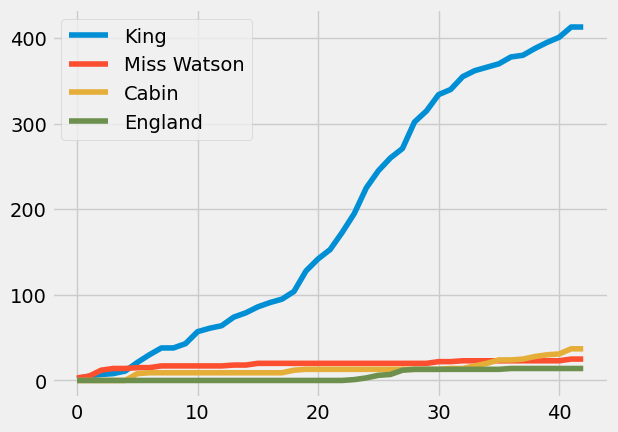

In [13]:
count.plot()

## Task 5

Create a table for your chosen book with two columns, the length (in characters) and number of periods for each chapter. Adapt the code from Section 1.3.2 to do this. Finally, create a scatterplot that graphs all three books' periods vs. characters, using a different color for each book, just like Section 1.3.2 does for the two books. Add comments in a text box if you notice anything interesting!

In [ ]:

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])



In [23]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

new_df_huck = pd.DataFrame({'Huck_finn_chapter_len': [len(x) for x in huck_finn_chapters], 
                       'Number of periods': np.char.count(huck_finn_chapters, '.')})
new_df_little = pd.DataFrame({'LittleWoman_chapter_len': [len(x) for x in little_women_chapters], 
                       'Number of periods': np.char.count(little_women_chapters, '.')})


new_df_huck.head()

,Huck_finn_chapter_len,Number of periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91


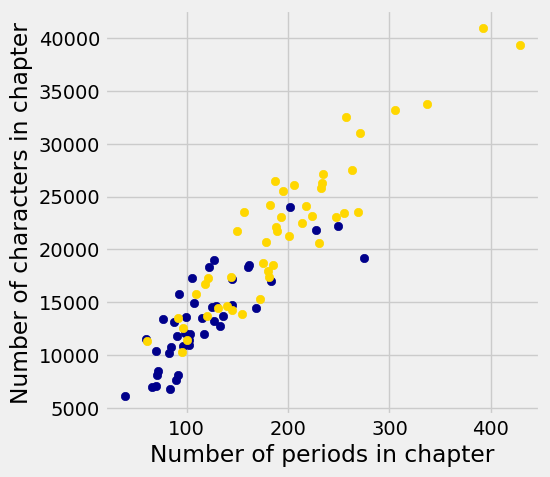

In [26]:
plots.figure(figsize=(5, 5))
plots.scatter(new_df_huck['Number of periods'], 
              new_df_huck['Huck_finn_chapter_len'], 
              color='darkblue')
plots.scatter(new_df_little['Number of periods'], 
              new_df_little['LittleWoman_chapter_len'], 
              color='gold')

plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');